In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def generateData(n1, n2):
    theta = np.random.uniform(0, 2*math.pi, n1 + n2)
    r = np.hstack((np.random.normal(0,0.2,n1),np.random.normal(1,0.2,n2)))
    temrcos = []
    temrsin = []
    for i in range(n1 + n2):
        temrcos.append(r[i]*math.cos(theta[i]))
        temrsin.append(r[i]*math.sin(theta[i]))
    y = np.hstack((np.repeat([0],n1),np.repeat([1],n2)))
    return({"x1":temrcos,"x2":temrsin,"y":y})

In [33]:
data = generateData(100,100)

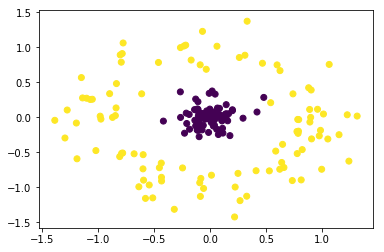

In [4]:
plt.scatter(data["x1"], data["x2"], c=data["y"])
plt.show()

In [34]:
data_x1 = np.float32(data["x1"])[:, np.newaxis]
data_x2 = np.float32(data["x2"])[:, np.newaxis]
data_y = np.float32(data["y"])[:, np.newaxis]
data_test = np.hstack((data_x1, data_x2))



In [6]:
def first_layer(input1, input2, in_size, out_size, activation_function=None,):
    Weight1 = tf.Variable(tf.random_normal([in_size, out_size]))
    Weight2 = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(input1, Weight1) + tf.matmul(input2, Weight2) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

In [7]:
def second_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


In [27]:
x1 = tf.placeholder(tf.float32,[None,1])
x2 = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

In [28]:
l1 = first_layer(x1, x2, 1,10, activation_function=tf.nn.relu)
prediction = second_layer(l1, 10, 1,  activation_function=tf.nn.softmax)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(prediction), reduction_indices=[1]))   # loss
train = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()


In [26]:
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1000):
    sess.run(train, feed_dict = {x1:data_x1, x2:data_x2, y:data_y})
    #sess.run(train)
    if i % 50 == 0:
        print(i, sess.run(cross_entropy))

InvalidArgumentError: Shape [-1,1] has negative dimensions
	 [[Node: Placeholder_9 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_9', defined at:
  File "C:\Users\HP\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\HP\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\HP\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\HP\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\HP\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\HP\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\HP\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\HP\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\HP\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-6df87e625e9e>", line 1, in <module>
    x1 = tf.placeholder(tf.float32,[None,1])
  File "C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,1] has negative dimensions
	 [[Node: Placeholder_9 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [128]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [130]:
mnist.train